# Chapter 3, Exercise 9

In [2]:
Auto = read.csv("C:/Users/Daniel Choi/git/comp_labs/COMP4432/HW1/Auto.csv", header=T, na.strings="?")
Auto = na.omit(Auto)

### (a)

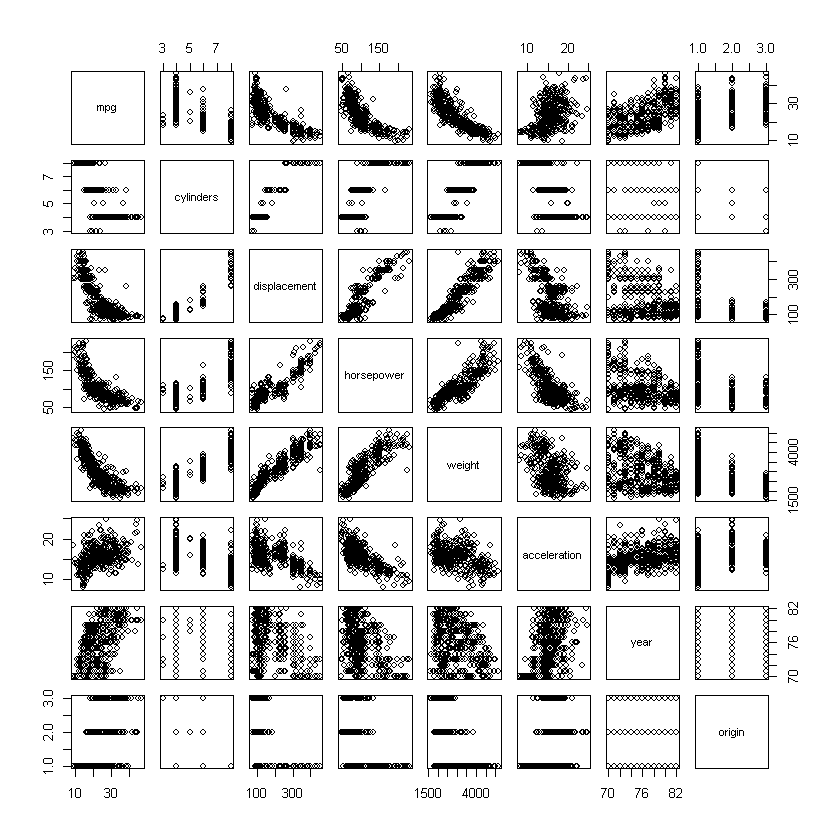

In [3]:
pairs(Auto[1:8])

### (b)

In [4]:
cor(Auto[-9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


### (c)

In [5]:
yhat_lm = lm(mpg~.-name, data=Auto)
summary(yhat_lm)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


In [6]:
coef(yhat_lm)["year"]

year 
0.7507727

i. Since p-value is very small there is a strong evidence to believe that there is a relationship between predictors and ```mpg```  
  
ii. predictors except ```cylinders```, ```horsepower```, and ```acceration```, have significant relationship to the response.  
  
iii. coefficient of ```year``` (i.e. 0.75) indicates that the rate of increase in mpg every year


### (d)

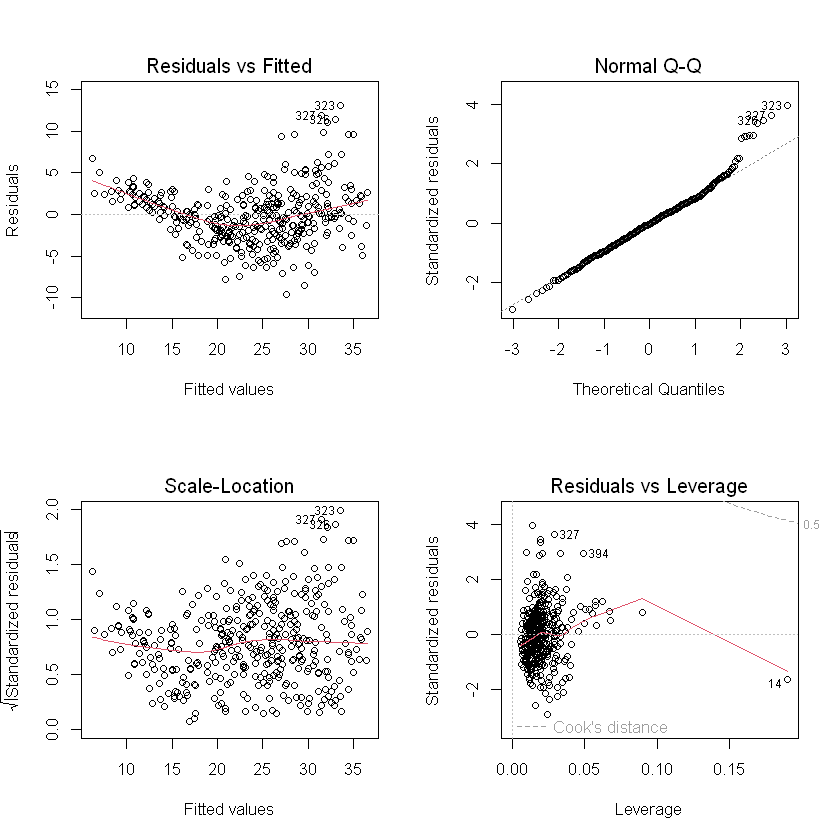

In [7]:
par(mfrow=c(2,2))
plot(yhat_lm)


1. Residuals-Fitted graph indicates the presence of non-linearity in the relationship between predictors and response 


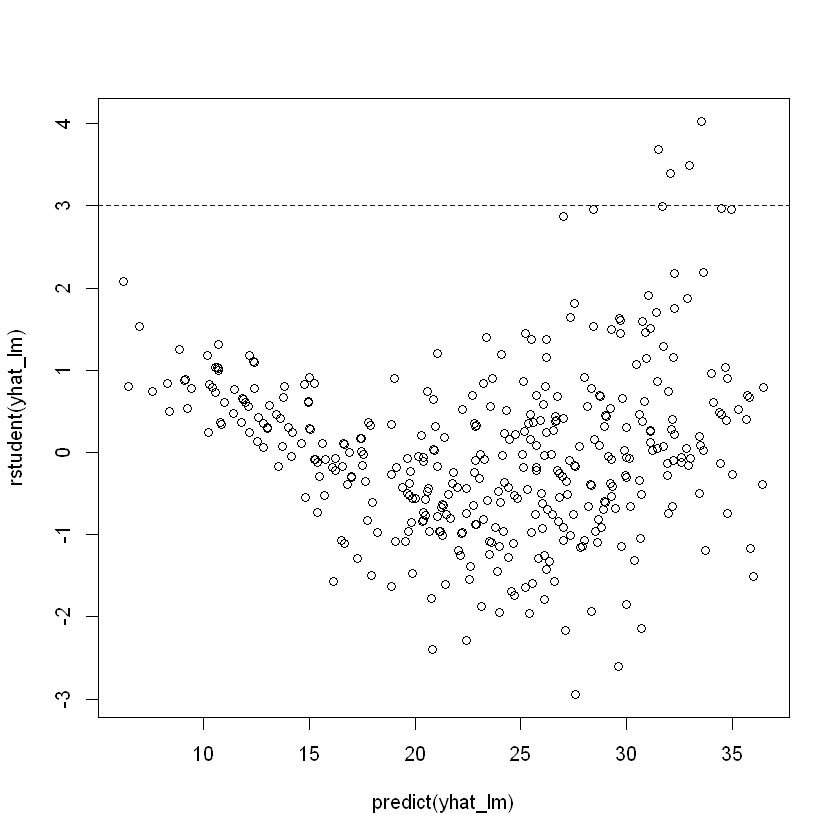

In [8]:
plot(predict(yhat_lm), rstudent(yhat_lm))
abline(h=3, col="blue", lty=2)

2. In rstudent residual-Fitted value graph, there are 4 rstudentized residuals (> 3) which indicates the potential outliers.

### (e)

In [9]:
lm_asterisk <- lm(formula = mpg ~ . * ., data = Auto[, -9])

In [10]:
summary(lm_asterisk)


Call:
lm(formula = mpg ~ . * ., data = Auto[, -9])

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6303 -1.4481  0.0596  1.2739 11.1386 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                3.548e+01  5.314e+01   0.668  0.50475   
cylinders                  6.989e+00  8.248e+00   0.847  0.39738   
displacement              -4.785e-01  1.894e-01  -2.527  0.01192 * 
horsepower                 5.034e-01  3.470e-01   1.451  0.14769   
weight                     4.133e-03  1.759e-02   0.235  0.81442   
acceleration              -5.859e+00  2.174e+00  -2.696  0.00735 **
year                       6.974e-01  6.097e-01   1.144  0.25340   
origin                    -2.090e+01  7.097e+00  -2.944  0.00345 **
cylinders:displacement    -3.383e-03  6.455e-03  -0.524  0.60051   
cylinders:horsepower       1.161e-02  2.420e-02   0.480  0.63157   
cylinders:weight           3.575e-04  8.955e-04   0.399  0.69000   
cylinders:acceleration 

Following interactions are statistically significant:  

1. displacement:year
2. acceleration:year 
3. acceleration:origin  

### (f)

From (a), we can observe that displacement, horsepower and weight follow logarithmic form.

In [11]:
lm_transform <- lm(formula = log(mpg) ~ ., data = Auto[, -9])
summary(lm_transform)


Call:
lm(formula = log(mpg) ~ ., data = Auto[, -9])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40955 -0.06533  0.00079  0.06785  0.33925 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.751e+00  1.662e-01  10.533  < 2e-16 ***
cylinders    -2.795e-02  1.157e-02  -2.415  0.01619 *  
displacement  6.362e-04  2.690e-04   2.365  0.01852 *  
horsepower   -1.475e-03  4.935e-04  -2.989  0.00298 ** 
weight       -2.551e-04  2.334e-05 -10.931  < 2e-16 ***
acceleration -1.348e-03  3.538e-03  -0.381  0.70339    
year          2.958e-02  1.824e-03  16.211  < 2e-16 ***
origin        4.071e-02  9.955e-03   4.089 5.28e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1191 on 384 degrees of freedom
Multiple R-squared:  0.8795,	Adjusted R-squared:  0.8773 
F-statistic: 400.4 on 7 and 384 DF,  p-value: < 2.2e-16


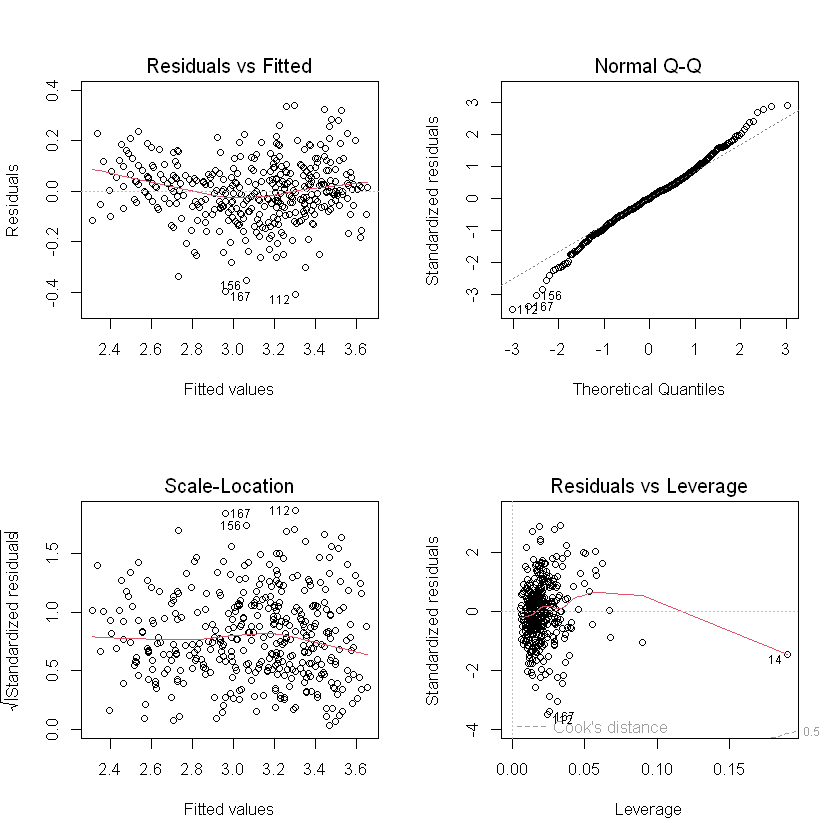

In [12]:
par(mfrow=c(2,2)) 
plot(lm_transform)

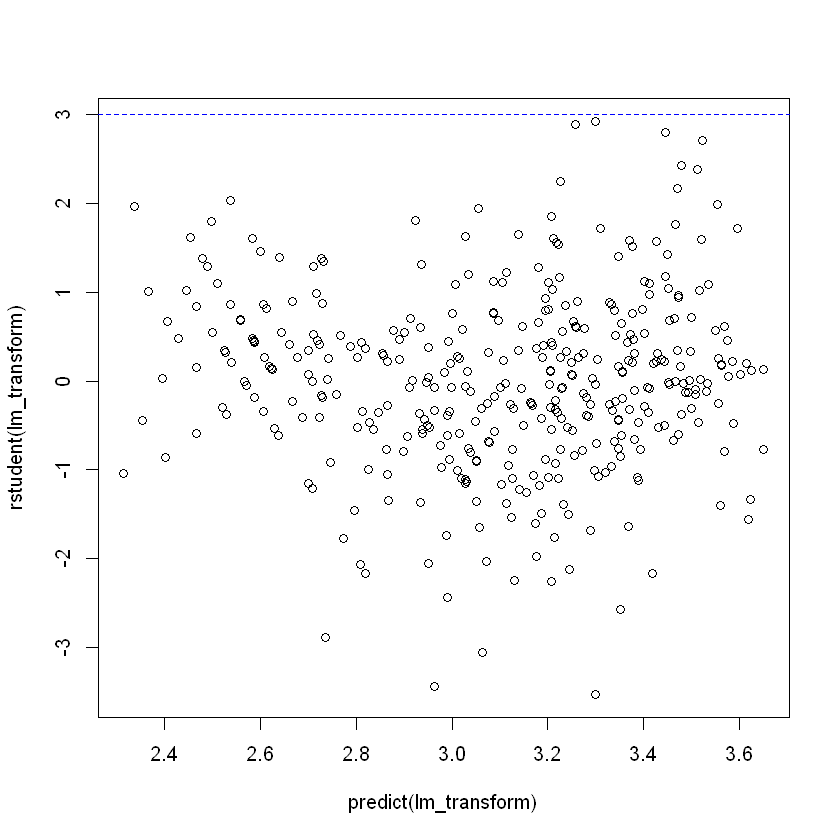

In [13]:
plot(predict(lm_transform), rstudent(lm_transform))
abline(h=3, col="blue", lty=2)

1. The residual plot now shows that the data is more suitable for linear regression than the fit without transformation
2. The studentized residual plot indicates one potential outlier (> 3)
3. Normal Q-Q is still not a perfectly linear, but there are less outliers than before